In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix

In [3]:
train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test.csv', index_col=0)

In [46]:
train.head()

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6
id,,,,,,,,,,,,,,,,,,,,,
0,323.390782,9.879918,5.875576,5.875576,4.304757,4.304757,2.754513,1.749203,0.000000,11.938294,...,4.794537,35.527357,0,0,1,1,0,0,0,0
1,273.723798,7.259037,4.441467,5.834958,3.285046,4.485235,2.201375,1.289775,45.135471,0.000000,...,13.825658,44.707310,0,0,0,1,1,0,0,0
2,521.643822,10.911303,8.527859,11.050864,6.665291,9.519706,5.824822,1.770579,15.645394,6.606882,...,17.964475,45.660120,0,0,1,1,0,0,1,0
3,567.431166,12.453343,7.089119,12.833709,6.478023,10.978151,7.914542,3.067181,95.639554,0.000000,...,31.961948,87.509997,0,0,1,1,0,0,0,0
4,112.770735,4.414719,2.866236,2.866236,1.875634,1.875634,1.036450,0.727664,17.980451,12.841643,...,9.589074,33.333333,2,2,1,0,1,1,1,0


In [47]:
test.head()

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2
id,,,,,,,,,,,,,,,,,,,,,
14838,344.632371,7.283603,4.473966,5.834958,3.412257,4.651530,2.096558,1.116433,49.458581,0.000000,...,13.512441,0.000000,0.000000,0.000000,26.809272,24.539800,4.794537,47.304082,1,1
14839,1432.410201,10.663869,7.079026,8.065215,5.297097,5.297097,3.924155,2.569694,0.000000,29.783175,...,0.000000,34.947374,98.323987,9.606882,0.000000,53.378235,0.000000,43.166667,0,0
14840,83.352608,3.931852,1.774215,1.774215,1.073446,1.073446,0.467830,0.170838,5.969305,6.420822,...,5.969305,0.000000,0.000000,6.420822,11.752550,13.344559,9.589074,24.666667,1,1
14841,150.255712,5.912790,3.548812,3.548812,2.595128,2.595128,1.642813,0.694113,0.000000,0.000000,...,59.935299,0.000000,0.000000,0.000000,17.744066,32.290168,4.794537,26.778866,0,0
14842,1817.276351,24.910940,15.540529,20.047314,12.535886,17.730988,11.979618,4.431173,84.554972,47.360206,...,23.468091,25.609359,0.000000,37.099000,69.141353,38.704130,50.697492,102.583333,0,0


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14838 entries, 0 to 14837
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BertzCT            14838 non-null  float64
 1   Chi1               14838 non-null  float64
 2   Chi1n              14838 non-null  float64
 3   Chi1v              14838 non-null  float64
 4   Chi2n              14838 non-null  float64
 5   Chi2v              14838 non-null  float64
 6   Chi3v              14838 non-null  float64
 7   Chi4n              14838 non-null  float64
 8   EState_VSA1        14838 non-null  float64
 9   EState_VSA2        14838 non-null  float64
 10  ExactMolWt         14838 non-null  float64
 11  FpDensityMorgan1   14838 non-null  float64
 12  FpDensityMorgan2   14838 non-null  float64
 13  FpDensityMorgan3   14838 non-null  float64
 14  HallKierAlpha      14838 non-null  float64
 15  HeavyAtomMolWt     14838 non-null  float64
 16  Kappa3             148

In [48]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9893 entries, 14838 to 24730
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BertzCT            9893 non-null   float64
 1   Chi1               9893 non-null   float64
 2   Chi1n              9893 non-null   float64
 3   Chi1v              9893 non-null   float64
 4   Chi2n              9893 non-null   float64
 5   Chi2v              9893 non-null   float64
 6   Chi3v              9893 non-null   float64
 7   Chi4n              9893 non-null   float64
 8   EState_VSA1        9893 non-null   float64
 9   EState_VSA2        9893 non-null   float64
 10  ExactMolWt         9893 non-null   float64
 11  FpDensityMorgan1   9893 non-null   float64
 12  FpDensityMorgan2   9893 non-null   float64
 13  FpDensityMorgan3   9893 non-null   float64
 14  HallKierAlpha      9893 non-null   float64
 15  HeavyAtomMolWt     9893 non-null   float64
 16  Kappa3             

In [4]:
train.describe()

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6
count,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,...,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000
mean,515.153604,9.135189,5.854307,6.738497,4.432570,5.253221,3.418749,1.773472,29.202823,10.435316,...,13.636941,49.309959,0.458215,0.459226,0.667745,0.798962,0.313789,0.279081,0.144831,0.151570
std,542.456370,6.819989,4.647064,5.866444,3.760516,4.925065,3.436208,1.865898,31.728679,13.651843,...,14.598554,29.174824,0.667948,0.668111,0.471038,0.400790,0.464047,0.448562,0.351942,0.358616
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-5.430556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,149.103601,4.680739,2.844556,2.932842,1.949719,2.034468,1.160763,0.503897,5.969305,0.000000,...,4.794537,30.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,290.987941,6.485270,4.052701,4.392859,2.970427,3.242775,1.948613,1.073261,17.353601,6.420822,...,9.589074,41.666667,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,652.652585,11.170477,7.486791,8.527859,5.788793,6.609350,4.502070,2.534281,44.876559,12.841643,...,14.912664,56.090650,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,4069.959780,69.551167,50.174588,53.431954,32.195368,34.579313,22.880836,16.072810,363.705954,99.936429,...,115.406157,384.450519,8.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
for column in train.columns:
    unique_values = train[column].unique()
    num_unique_values = len(unique_values)
    print(f"カラム名: {column}")
    print(f"ユニークな値: {unique_values}")
    print(f"ユニークな値の数: {num_unique_values}")
    print()

カラム名: id
ユニークな値: [    0     1     2 ... 14835 14836 14837]
ユニークな値の数: 14838

カラム名: BertzCT
ユニークな値: [323.3907823 273.7237977 521.6438224 ... 313.3331201 127.7095059
 632.2070408]
ユニークな値の数: 2368

カラム名: Chi1
ユニークな値: [ 9.87991785  7.25903748 10.9113027  ... 46.24737705  7.17898111
  9.50872556]
ユニークな値の数: 1259

カラム名: Chi1n
ユニークな値: [5.87557615 4.44146675 8.52785922 ... 4.9425352  3.84257099 1.44689825]
ユニークな値の数: 3157

カラム名: Chi1v
ユニークな値: [ 5.87557615  5.83495796 11.05086439 ...  4.9425352   5.14373854
  1.44689825]
ユニークな値の数: 3306

カラム名: Chi2n
ユニークな値: [4.30475734 3.28504603 6.66529105 ... 2.69243419 0.87949679 5.27656796]
ユニークな値の数: 3634

カラム名: Chi2v
ユニークな値: [ 4.30475734  4.48523529  9.51970587 ... 19.316775   21.14413764
  0.87949679]
ユニークな値の数: 3725

カラム名: Chi3v
ユニークな値: [2.75451314 2.20137482 5.82482214 ... 0.68258656 6.20985912 1.95517122]
ユニークな値の数: 3448

カラム名: Chi4n
ユニークな値: [1.7492031  1.28977459 1.77057862 ... 3.34253789 1.36147069 1.05455239]
ユニークな値の数: 2930

カラム名: EState_VSA1
ユニークな値: [  0.

In [49]:
train = train.drop(columns=['EC3', 'EC4', 'EC5', 'EC6'])

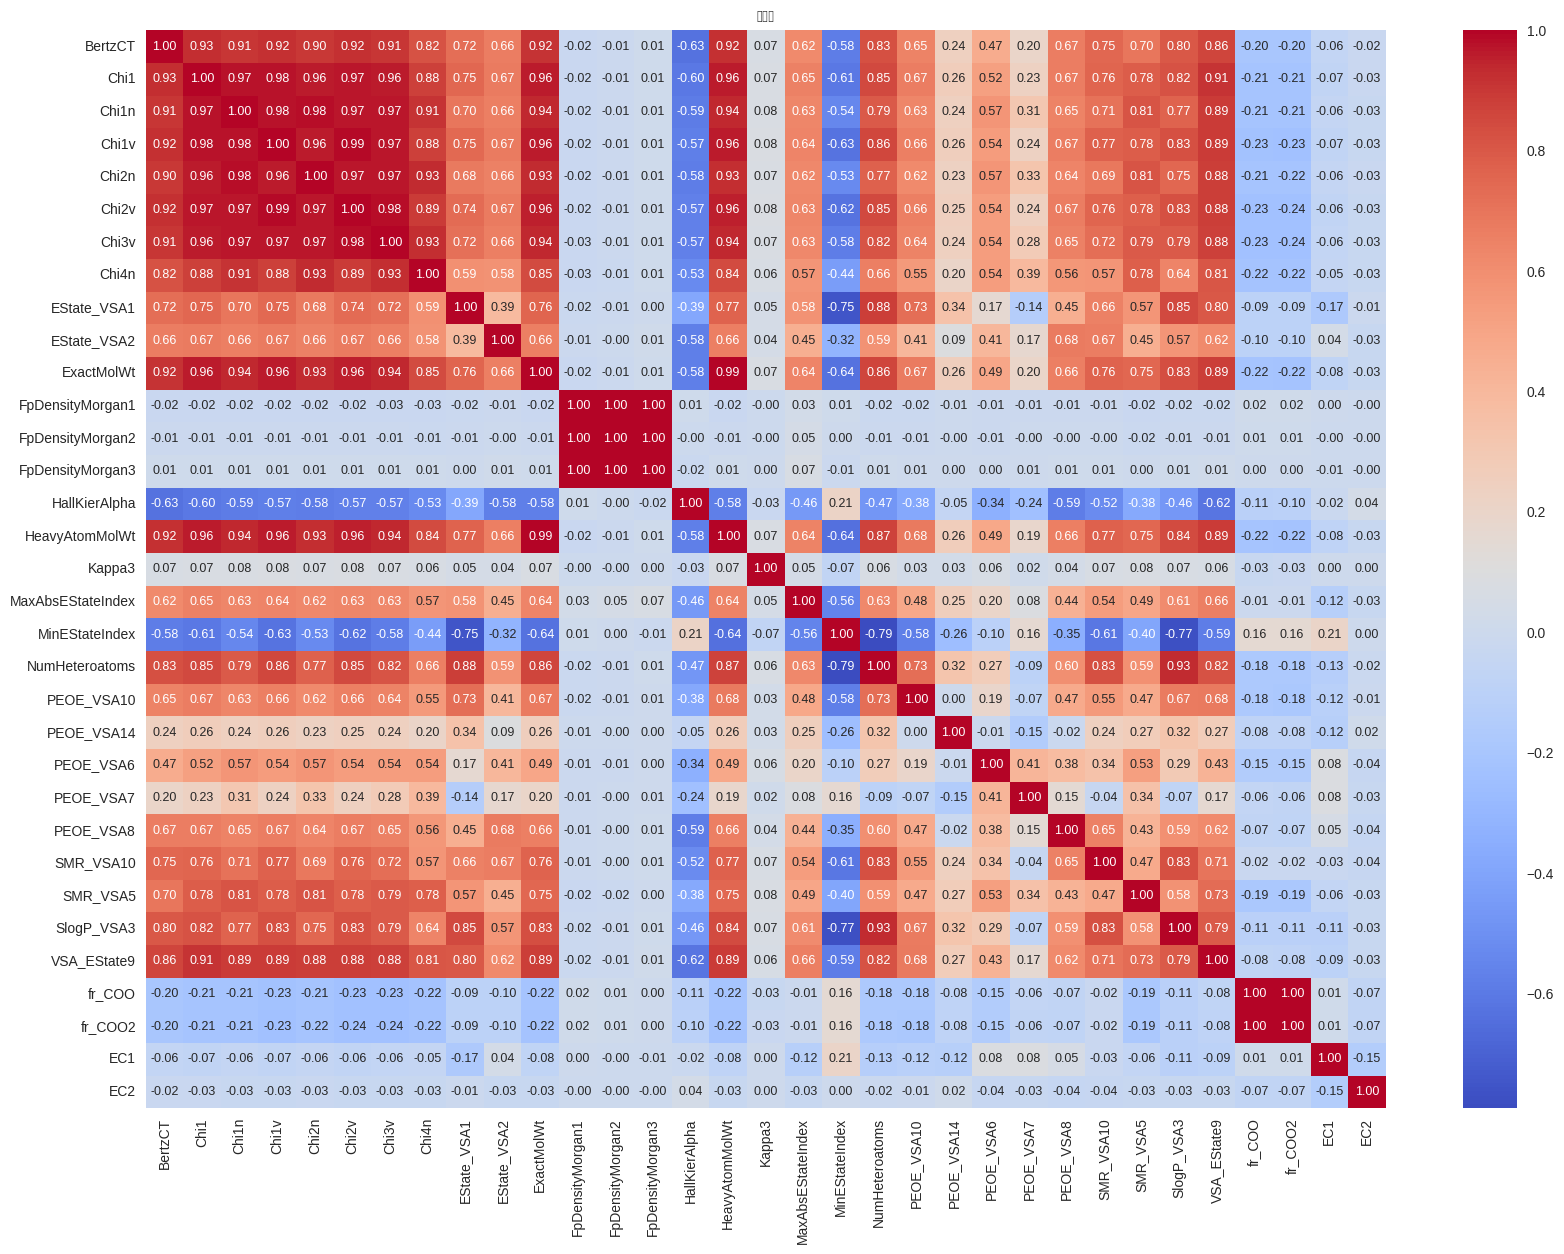

In [41]:
correlation_matrix = train.corr()

# ヒートマップを描画
plt.figure(figsize=(20, 14))  # グラフのサイズを設定
sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 9}, fmt=".2f", cmap='coolwarm')  # ヒートマップを描画
plt.title('Correlation diagram')  # グラフのタイトルを設定
plt.show()  # グラフを表示

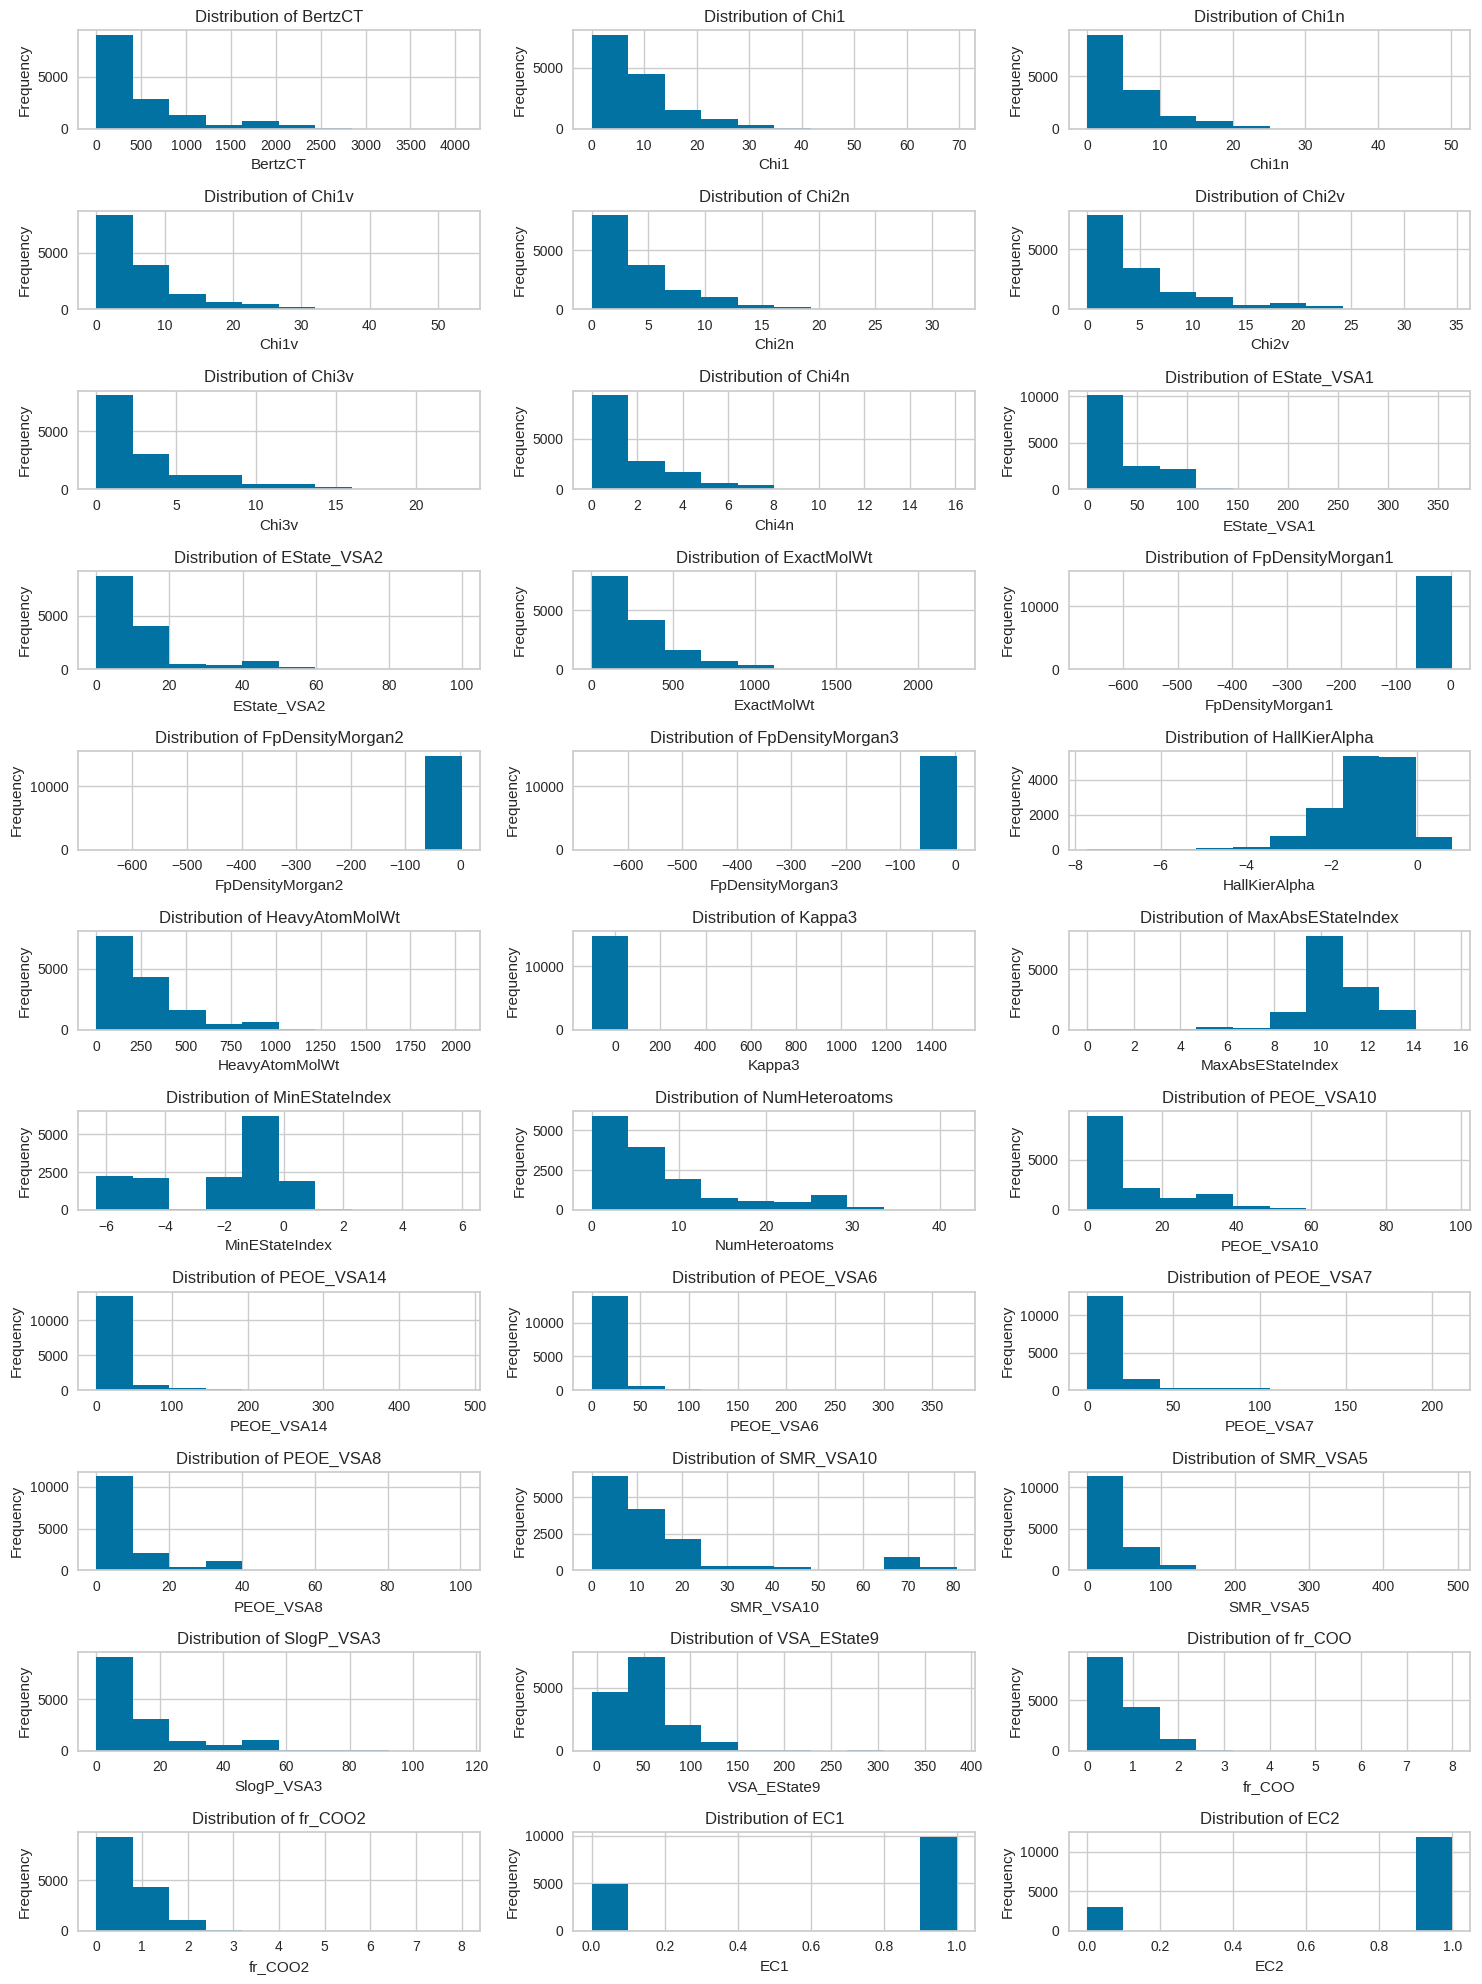

In [42]:
num_cols = 3  # 1行あたりの列数
num_rows = (len(train.columns) + num_cols - 1) // num_cols  # 必要な行数

# サブプロットの作成
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))  # figsizeで図のサイズを設定

# カラムごとにヒストグラムを描画
for i, column in enumerate(train.columns):
    ax = axes[i // num_cols, i % num_cols]  # サブプロットを取得
    train[column].hist(ax=ax)  # ヒストグラムを描画
    ax.set_xlabel(column)  # x軸のラベルを設定
    ax.set_ylabel('Frequency')  # y軸のラベルを設定
    ax.set_title(f'Distribution of {column}')  # グラフのタイトルを設定

plt.tight_layout()  # レイアウトの調整
plt.show()  # グラフを表示

In [50]:
X_train = train.drop(columns=['EC1', 'EC2'])
y_train = train[['EC1', 'EC2']]

In [51]:
model = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=0))

model.fit(X_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(random_state=0))

In [52]:
y_train_pred = model.predict(X_train)
print(classification_report(y_train, y_train_pred, target_names=['EC1', 'EC2']))

              precision    recall  f1-score   support

         EC1       1.00      1.00      1.00      9908
         EC2       1.00      1.00      1.00     11855

   micro avg       1.00      1.00      1.00     21763
   macro avg       1.00      1.00      1.00     21763
weighted avg       1.00      1.00      1.00     21763
 samples avg       0.96      0.96      0.96     21763



In [53]:
cm = multilabel_confusion_matrix(y_train, y_train_pred)

for i, matrix in enumerate(cm):
    print(f'Confusion matrix for target {y_train.columns[i]}:')
    print(matrix)

Confusion matrix for target EC1:
[[4930    0]
 [   0 9908]]
Confusion matrix for target EC2:
[[ 2983     0]
 [    0 11855]]


In [54]:
# Retrain the model
model.fit(X_train, y_train)

# Make predictions on the test data
y_test_pred = model.predict(test)

# Create a DataFrame with the predictions
predictions = pd.DataFrame(y_test_pred, columns=['EC1', 'EC2'])

# Display the first few rows of the predictions
predictions.head()

,EC1,EC2
0,0,1
1,1,1
2,1,1
3,1,1
4,1,1


In [56]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission.head()
predictions['id'] = sample_submission['id']
predictions = predictions[['id', 'EC1', 'EC2']]
predictions.to_csv('submission.csv', index=False)
predictions.head()

,id,EC1,EC2
0,14838,0,1
1,14839,1,1
2,14840,1,1
3,14841,1,1
4,14842,1,1
